In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [80]:
data = '/kaggle/input/forest-type-classification-spai/train.csv'
df = pd.read_csv(data)

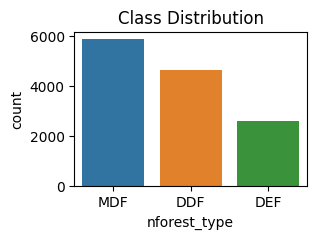

nforest_type
MDF    5865
DDF    4603
DEF    2585
Name: count, dtype: int64

In [82]:
plt.figure(figsize=(3, 2))
ax = sns.countplot(data=df, x='nforest_type')
plt.title('Class Distribution')
plt.show()

df['nforest_type'].value_counts()

In [83]:
X = df.drop(['nforest_type'], axis=1)
y = df['nforest_type']

In [66]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
rf_classifier = RandomForestClassifier(n_estimators=300, random_state=42)

In [86]:
# rf_classifier.fit(X_train, y_train)
rf_classifier.fit(X, y)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# report = classification_report(y_test, y_pred)
# conf_matrix = confusion_matrix(y_test, y_pred)

In [69]:
# print(f'Accuracy: {accuracy}')
# print('Classification Report:')
# print(report)
# # print('Confusion Matrix:')
# # print(conf_matrix)

Accuracy: 0.693603983148219
Classification Report:
              precision    recall  f1-score   support

         DDF       0.66      0.62      0.64       930
         DEF       0.79      0.66      0.72       509
         MDF       0.68      0.77      0.72      1172

    accuracy                           0.69      2611
   macro avg       0.71      0.68      0.69      2611
weighted avg       0.70      0.69      0.69      2611



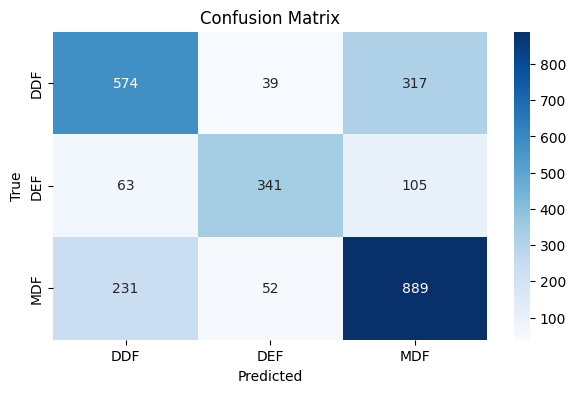

In [70]:
# # Visualize the confusion matrix with forest type categories
# categories = ['DDF', 'DEF', 'MDF']
# plt.figure(figsize=(7, 4))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.title('Confusion Matrix')
# plt.show()

In [87]:
test = '/kaggle/input/forest-type-classification-spai/test.csv'
df_test = pd.read_csv(test)

In [88]:
# Make predictions on the test set
test_predictions = rf_classifier.predict(df_test)

In [89]:
submission = pd.DataFrame({
    'id': df_test['id'],
    'nforest_type': test_predictions
})

In [90]:
submission

,id,nforest_type
0,13467,DEF
1,12719,MDF
2,1054,MDF
3,13747,DDF
4,9453,DDF
...,...,...
3995,115,DDF
3996,10654,MDF
3997,5718,DDF
3998,13054,MDF


In [91]:
# Save the submission file
submission_file_path = 'submission-random.csv'
submission.to_csv(submission_file_path, index=False)